In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import folium
import seaborn as sns
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)

In [4]:
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

In [5]:
patient_info = pd.read_csv("/content/PatientInfo.csv", encoding="utf-8")

In [6]:
column_name = ["patient_id", "sex", "age", "infection_case", "confirmed_date", "released_date", "state"]

In [7]:
patient_info = patient_info[column_name]
#필요없는 column제거

In [8]:
patient_info = patient_info[patient_info["sex"].notnull()]
patient_info = patient_info[patient_info["age"].notnull()]
patient_info = patient_info[patient_info["infection_case"].notnull()]
patient_info = patient_info[patient_info["confirmed_date"].notnull()]
patient_info = patient_info[patient_info["released_date"].notnull()]
patient_info
#공백 있는곳 제거

,patient_id,sex,age,infection_case,confirmed_date,released_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,released
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,released
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,released
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,released
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...
3997,7000000008,female,10s,overseas inflow,2020-03-27,2020-04-12,released
3998,7000000009,female,20s,overseas inflow,2020-03-29,2020-04-28,released
3999,7000000010,female,20s,overseas inflow,2020-04-03,2020-04-21,released
4001,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,released


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


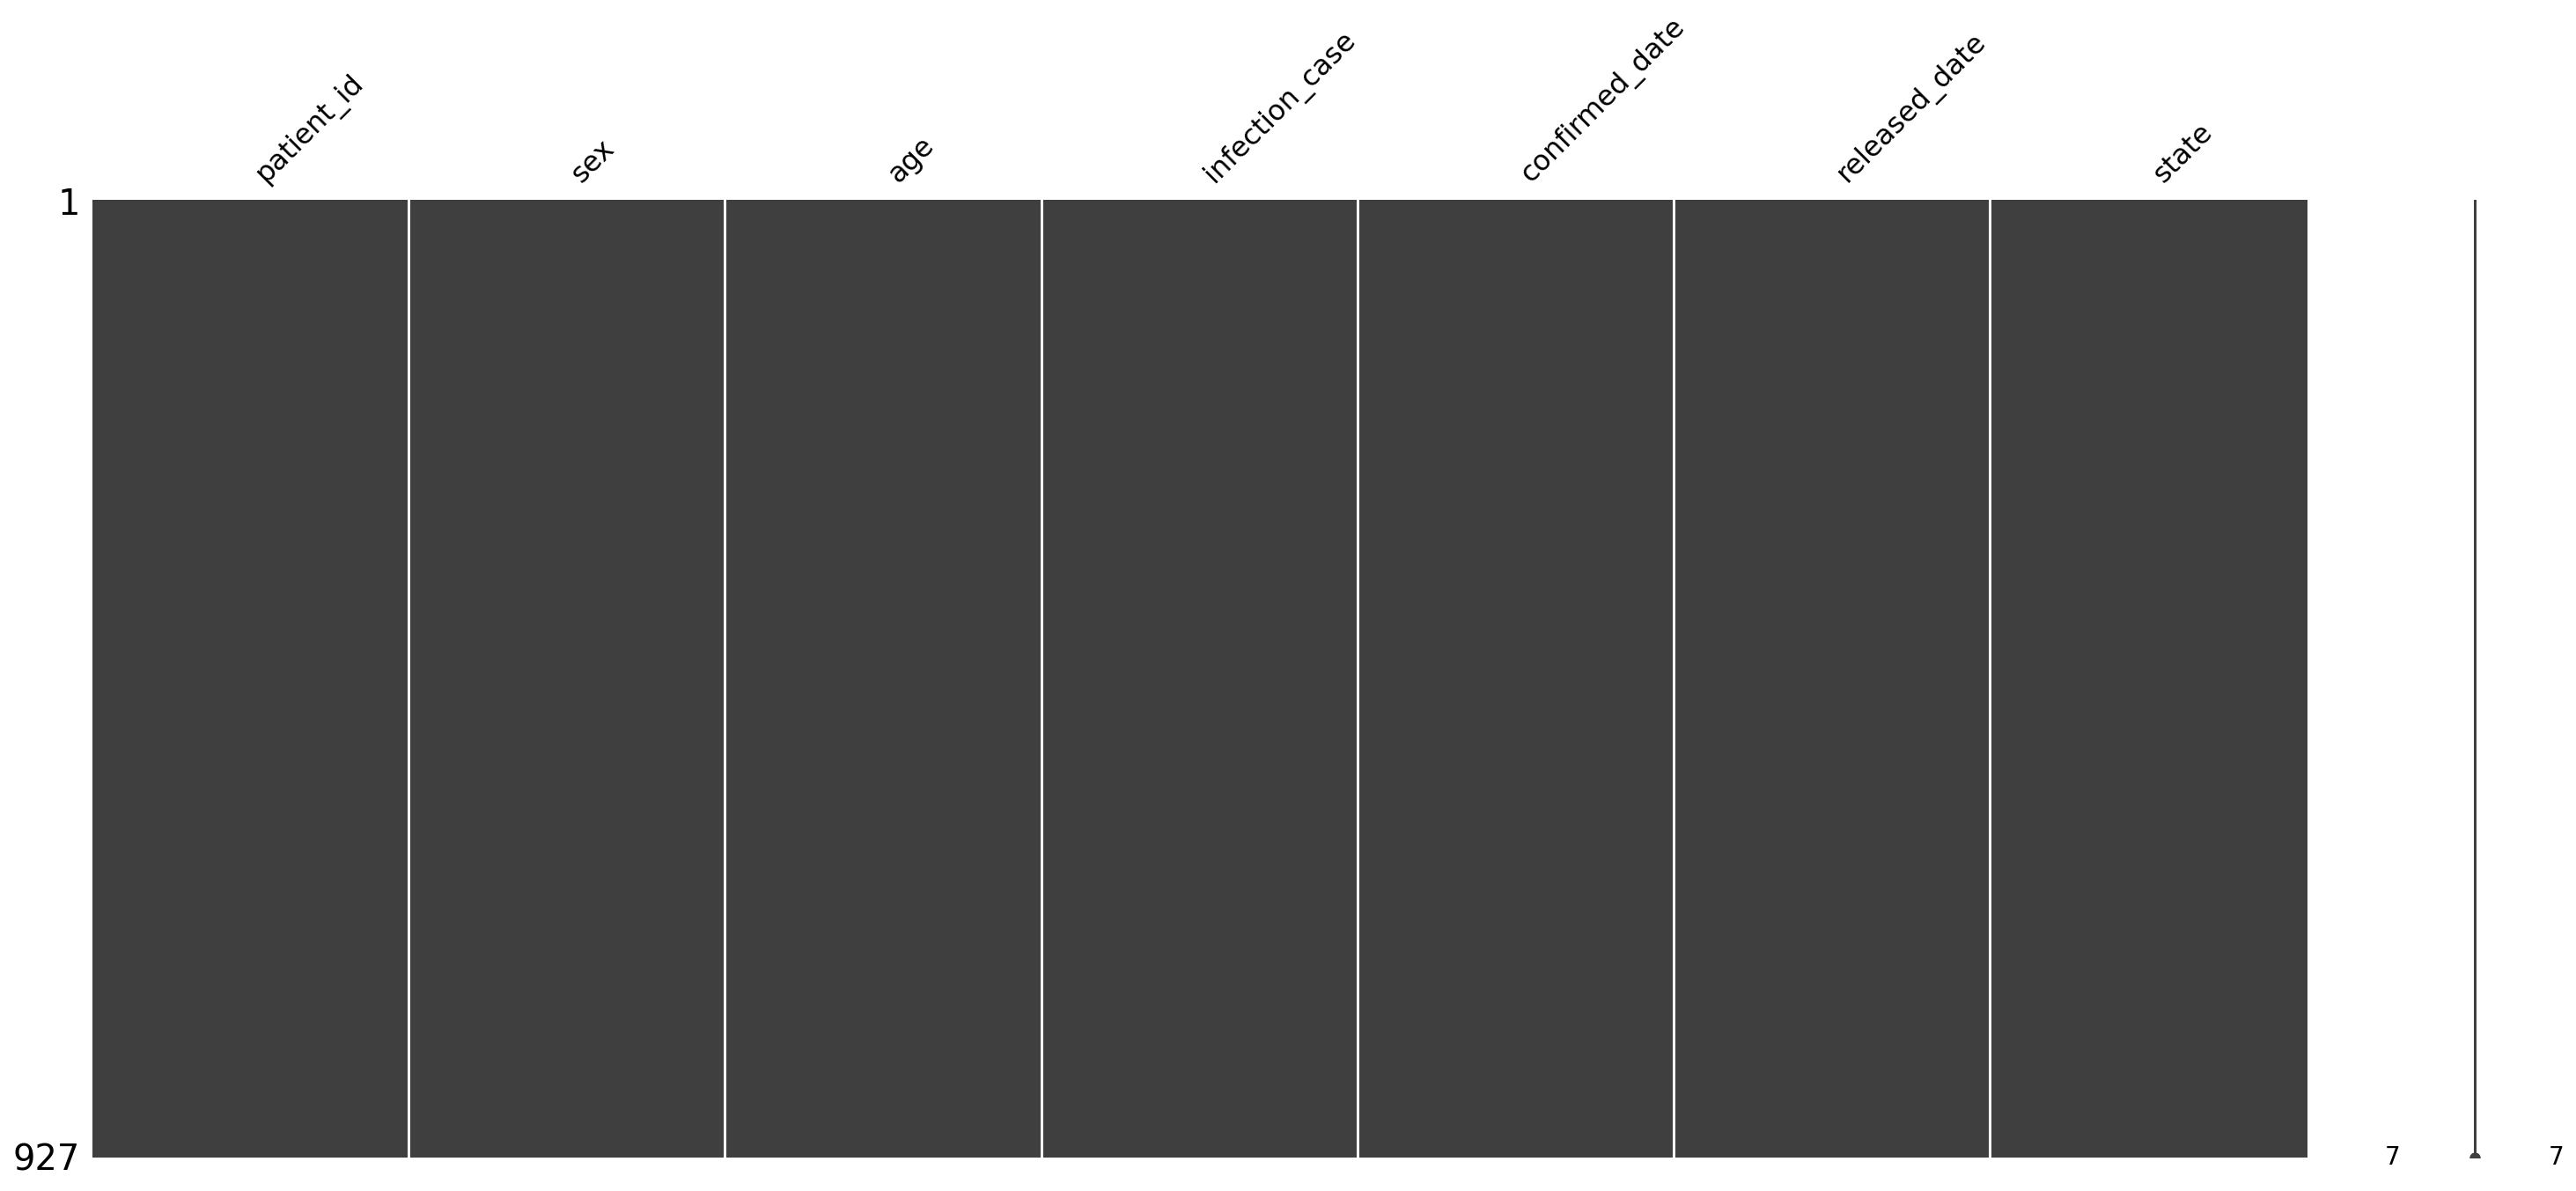

In [9]:
msno.matrix(patient_info)
#공백 확인

In [10]:
patient_middle_age = patient_info[patient_info["age"].str.contains("30s|40s|50s")]
#중년층 데이터

In [11]:
patient_young_age = patient_info[patient_info["age"].str.contains("10s|20s")]
#청소년층 데이터

In [12]:
from datetime import datetime, timedelta

In [13]:
#문자열을 날짜로 변환
patient_middle_age["confirmed_date"] = patient_middle_age["confirmed_date"].apply(lambda x:
                                                                                 datetime.strptime(x, "%Y-%m-%d"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
patient_middle_age["released_date"] = patient_middle_age["released_date"].apply(lambda x:
                                                                                 datetime.strptime(x, "%Y-%m-%d"))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
patient_middle_age["days"] = patient_middle_age["released_date"] - patient_middle_age["confirmed_date"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
patient_middle_age

,patient_id,sex,age,infection_case,confirmed_date,released_date,state,days
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,released,13 days
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,released,32 days
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,released,20 days
5,1000000006,female,50s,contact with patient,2020-01-31,2020-02-19,released,19 days
8,1000000009,male,30s,overseas inflow,2020-02-05,2020-02-21,released,16 days
...,...,...,...,...,...,...,...,...
3952,6100000085,male,30s,overseas inflow,2020-03-16,2020-04-08,released,23 days
3959,6100000092,male,40s,overseas inflow,2020-03-28,2020-04-15,released,18 days
3992,7000000003,female,40s,etc,2020-03-02,2020-03-15,released,13 days
3993,7000000004,male,40s,etc,2020-03-04,2020-03-21,released,17 days


In [17]:
patient_middle_age["days"] = patient_middle_age["days"].dt.days
#days제거

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
patient_young_age["confirmed_date"] = patient_young_age["confirmed_date"].apply(lambda x:
                                                                                 datetime.strptime(x, "%Y-%m-%d"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
patient_young_age["released_date"] = patient_young_age["released_date"].apply(lambda x:
                                                                                 datetime.strptime(x, "%Y-%m-%d"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
patient_young_age["days"] = patient_young_age["released_date"] - patient_young_age["confirmed_date"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
patient_young_age

,patient_id,sex,age,infection_case,confirmed_date,released_date,state,days
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,released,16 days
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,released,24 days
6,1000000007,male,20s,contact with patient,2020-01-31,2020-02-10,released,10 days
7,1000000008,male,20s,overseas inflow,2020-02-02,2020-02-24,released,22 days
11,1000000012,male,20s,overseas inflow,2020-02-07,2020-02-27,released,20 days
...,...,...,...,...,...,...,...,...
3997,7000000008,female,10s,overseas inflow,2020-03-27,2020-04-12,released,16 days
3998,7000000009,female,20s,overseas inflow,2020-03-29,2020-04-28,released,30 days
3999,7000000010,female,20s,overseas inflow,2020-04-03,2020-04-21,released,18 days
4001,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,released,32 days


In [22]:
patient_young_age["days"] = patient_young_age["days"].dt.days

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
patient_young_age[["age", "days"]].groupby("age").mean()
#나이별 회복에 걸린시간

,days
age,
10s,21.057143
20s,22.259067


In [24]:
patient_young_age[["sex", "days"]].groupby("sex").mean()
#성별에 따른 회복에 걸린시간

,days
sex,
female,22.907563
male,21.165138


In [25]:
patient_middle_age[["age", "days"]].groupby("age").mean()

,days
age,
30s,21.689189
40s,24.386905
50s,24.117284


In [26]:
patient_middle_age[["sex", "days"]].groupby("sex").mean()

,days
sex,
female,23.257143
male,23.673820


In [27]:
patient_info = pd.read_csv("/content/PatientInfo.csv", encoding="utf-8")

In [28]:
column_name = ["patient_id", "sex", "age", "infection_case", "state"]

In [29]:
patient_info = patient_info[column_name]

In [30]:
patient_info = patient_info[patient_info["sex"].notnull()]
patient_info = patient_info[patient_info["age"].notnull()]
patient_info = patient_info[patient_info["infection_case"].notnull()]

In [31]:
patient_1020 = patient_info[patient_info["age"].str.contains("10s|20s")]
#10~20대 환자만 조회

In [32]:
patient_304050 = patient_info[patient_info["age"].str.contains("30s|40s|50s")]
#30~50대 환자 조회

In [33]:
patient_304050 = patient_304050.sort_values(by=["age", "state"])

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


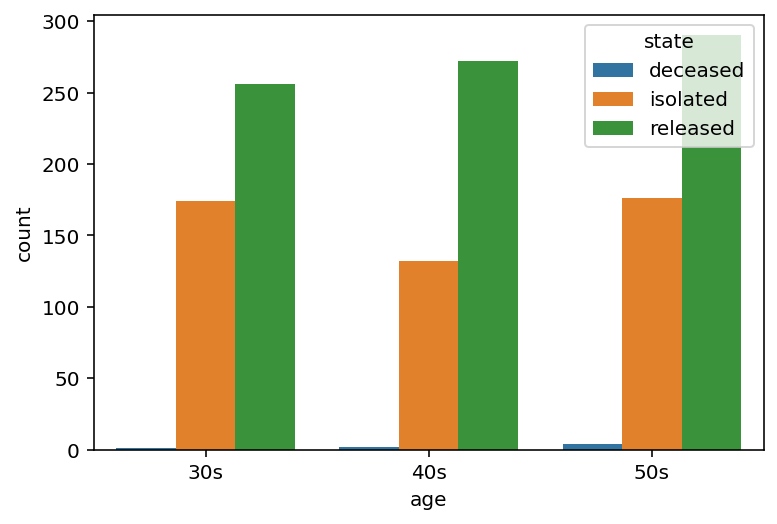

In [34]:
sns.countplot(data=patient_304050, x="age", hue="state")
#중년층 감염자 상태 조회

In [35]:
patient_1020 = patient_1020.sort_values(by=["age", "state"])

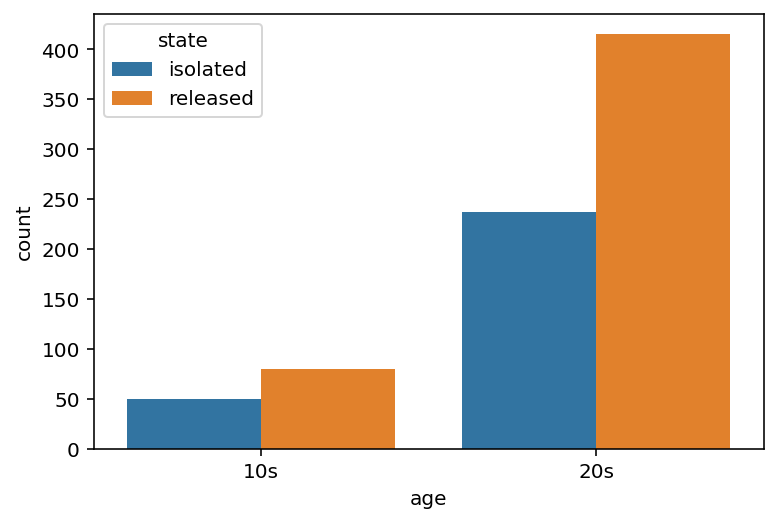

In [36]:
sns.countplot(data=patient_1020, x="age", hue="state")

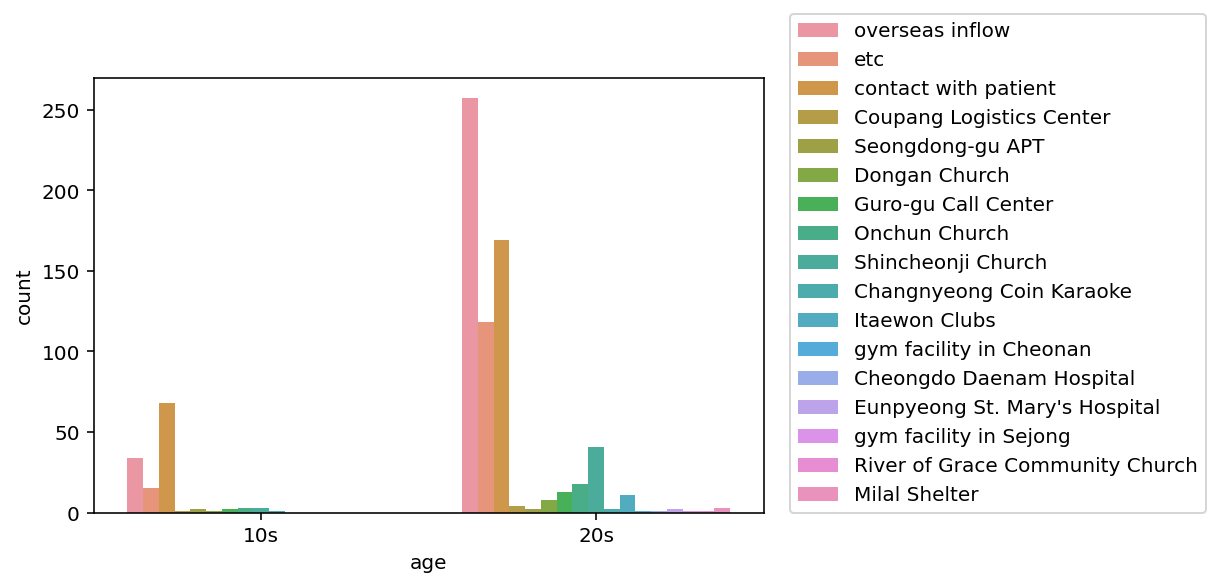

In [37]:
sns.countplot(data=patient_1020, x="age", hue="infection_case")
plt.legend(loc=(1.04, 0))

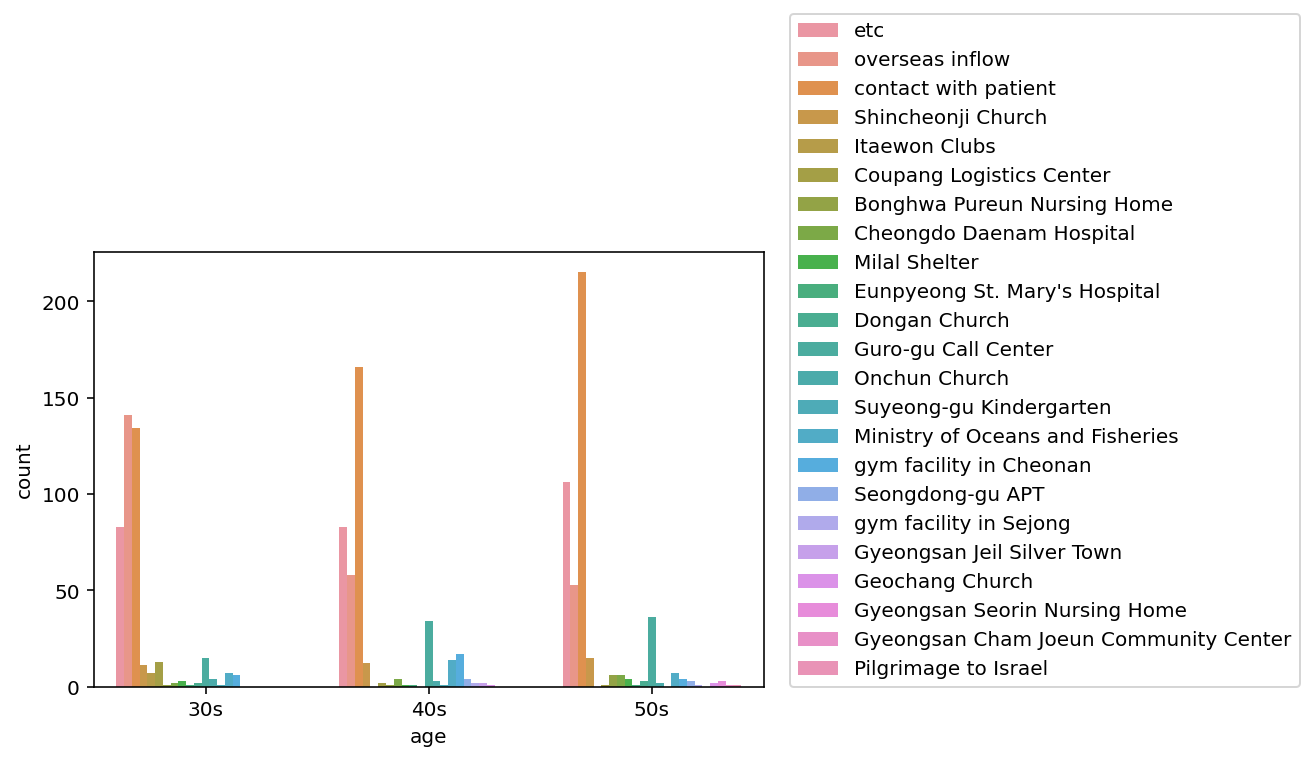

In [38]:
sns_plot = sns.countplot(data=patient_304050, x="age", hue="infection_case")
plt.legend(loc=(1.04, 0))

In [39]:
patient_timeage = pd.read_csv("/content/TimeAge.csv", encoding="utf-8")

In [40]:
patient_timeage = patient_timeage[patient_timeage["date"] == "2020-05-31"]
#제일 최근 data가져옴

In [41]:
patient_time1020 =  patient_timeage[patient_timeage["age"].str.contains("10s|20s")]
#10~20대 데이터

In [42]:
patient_time304050 = patient_timeage[patient_timeage["age"].str.contains("30s|40s|50s")]
#30~50대 데이터

In [43]:
patient_time1020["lethality"] = patient_time1020["deceased"] / patient_time1020["confirmed"] * 100
#치사율 계산

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
patient_time1020

,date,time,age,confirmed,deceased,lethality
811,2020-05-31,0,10s,655,0,0.0
812,2020-05-31,0,20s,3176,0,0.0


In [45]:
patient_time304050["lethality"] = patient_time304050["deceased"] / patient_time304050["confirmed"] * 100
#치사율 계산

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
patient_time304050

,date,time,age,confirmed,deceased,lethality
813,2020-05-31,0,30s,1292,2,0.154799
814,2020-05-31,0,40s,1521,3,0.197239
815,2020-05-31,0,50s,2039,15,0.735655


In [47]:
patient_time304050.loc[816] = ["2020-05-31", 0, "all middle", 1292+1521+2039, 2+3+15, 20/(1292+1521+2039) * 100]
#중년층 총합 데이터 추가

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
patient_time304050

,date,time,age,confirmed,deceased,lethality
813,2020-05-31,0,30s,1292,2,0.154799
814,2020-05-31,0,40s,1521,3,0.197239
815,2020-05-31,0,50s,2039,15,0.735655
816,2020-05-31,0,all middle,4852,20,0.412201


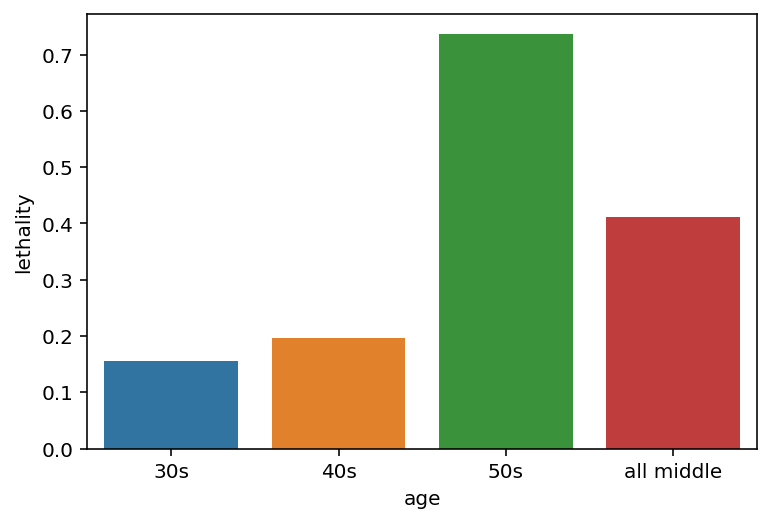

In [49]:
sns.barplot(data=patient_time304050, x="age", y="lethality")